In [21]:
using Plots
using Random
using SparseArrays
using LinearAlgebra
using MultiFloats
MultiFloats.use_bigfloat_transcendentals()
include("./phase.jl")
include("./gr.jl")

read_config (generic function with 1 method)

In [22]:
typeof(Float64x2(0.25))

MultiFloat{Float64, 2}

In [23]:
function grscan(;L = 20, θ = 0.25, R = 10, rng=Random.GLOBAL_RNG)
    grs = Array{Float64}[]
    ltc = Lattice2D(L, L, 1)
    @time for r in 1:R
        psi = compute_psi(L = L, θ = θ, rng = rng);
        lw = LatticeWave(ltc, log.(abs.(psi)));
        gr = filter(!isnan, eig_corr_full(lw));
        push!(grs, gr)
    end
    return vec(mean(reduce(hcat, grs), dims = 2))
end

grscan (generic function with 1 method)

In [ ]:
ham_sf_obc()

In [34]:
L = 41
@time psi = compute_psi(L = L, θ = Float64x2(0.25), rng = MersenneTwister());

  2.028647 seconds (78.98 k allocations: 7.772 GiB, 19.58% gc time)


In [35]:
gr2 = grscan(L = 41, R = 10, θ = Float64x4(0.25))

 67.917736 seconds (1.42 M allocations: 139.498 GiB, 6.94% gc time)


40-element Vector{Float64}:
 1.1594122134593372
 1.1736082086948012
 1.1824254869610424
 1.1945003821158804
 1.2081371866219526
 1.2061267367973358
 1.2105407523663843
 1.2174851211945004
 1.228473407758854
 1.2315866551111847
 1.2361845957700643
 1.2439638064096135
 1.2361040158801908
 ⋮
 1.300238842368073
 1.3049676648474473
 1.3122674250550213
 1.318116248769925
 1.3229134210779097
 1.3247501720115527
 1.3452506832703968
 1.3501733038030064
 1.350299587260891
 1.3676630831234813
 1.3745796158238779
 1.336143519120675

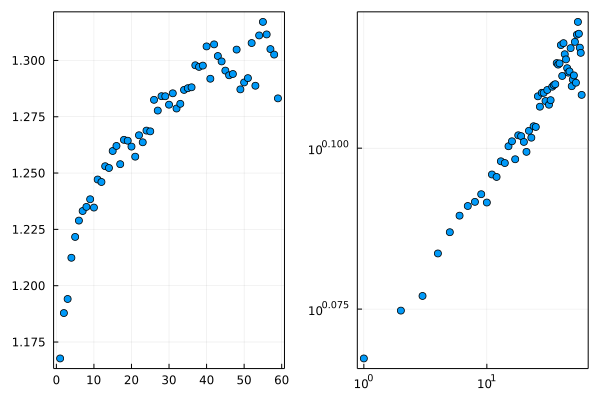

In [36]:
p1 = scatter(gr, legend = false, frame = :box)
p2 = scatter(gr, legend = false, frame = :box, xaxis = :log10, yaxis =:log10)
plot(p1, p2)